In [7]:
print("The following data fusion module was developed by the University of Bergamo whithin the scope of the RISEN project (under Grant Agreement No 883116). \nOne Class Suppport Vectore Machines was implemented as classification method to detect DMMP by fusing the experimental data of IMS and GC-QEPAS. \nThe module has been written to allow modifications and experimental data integrations in the last TTT.")

The following data fusion module was developed by the University of Bergamo whithin the scope of the RISEN project (under Grant Agreement No 883116). 
One Class Suppport Vectore Machines was implemented as classification method to detect DMMP by fusing the experimental data of IMS and GC-QEPAS. 
The module has been written to allow modifications and experimental data integrations in the last TTT.


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import OneClassSVM
from sklearn import svm
import matplotlib.pyplot as plt
import matplotlib.font_manager
import matplotlib.pyplot as plt
import plotly.express as px

In [9]:
#IMS data
data_IMS = pd.read_excel("/Users/giorgiofelizzato/Desktop/RISEN project/data fusion/Moduli python data fusion-final version/DMMP.xlsx", sheet_name='IMS', index_col=0, header=0)
data_IMS.head()

,Class,0.52,0.54,0.56,0.58,0.6,0.62,0.64,0.66,0.68,...,13.68,13.7,13.72,13.74,13.76,13.78,13.8,13.82,13.84,13.86
Sample_id,,,,,,,,,,,,,,,,,,,,,
1,DMMP,0.022,0.022,0.019,0.016,0.021,0.019,0.020,0.018,0.019,...,0.022,0.019,0.025,0.024,0.023,0.025,0.023,0.023,0.024,-0.035
2,DMMP,0.020,0.019,0.018,0.017,0.018,0.020,0.022,0.023,0.021,...,0.021,0.022,0.022,0.021,0.018,0.024,0.022,0.020,0.021,-0.035
3,DMMP,0.016,0.022,0.021,0.020,0.020,0.020,0.020,0.018,0.018,...,0.020,0.022,0.023,0.024,0.023,0.019,0.018,0.021,0.019,-0.035
4,DMMP,0.015,0.020,0.020,0.024,0.021,0.022,0.021,0.023,0.023,...,0.024,0.025,0.025,0.023,0.022,0.025,0.022,0.019,0.022,-0.035
5,DMMP,0.016,0.015,0.020,0.020,0.018,0.018,0.018,0.024,0.024,...,0.021,0.020,0.018,0.024,0.026,0.027,0.023,0.025,0.020,-0.035


In [10]:
#Gas chromatography data
data_GC = pd.read_excel("/Users/giorgiofelizzato/Desktop/RISEN project/data fusion/Moduli python data fusion-final version/DMMP.xlsx", sheet_name='GC', index_col=0, header=0)
data_GC.head()

,Class,RT
Sample_id,,
1,DMMP,131.01
2,DMMP,130.94
3,DMMP,130.89
4,DMMP,130.93
5,DMMP,137.54


In [11]:
#QEPAS (IR spectra) data
data_QEPAS = pd.read_excel("/Users/giorgiofelizzato/Desktop/RISEN project/data fusion/Moduli python data fusion-final version/DMMP.xlsx", sheet_name='QEPAS', index_col=0, header=0)
data_QEPAS.head()

,Class,10,9.9804,9.9608,9.9413,9.9219,9.9025,9.8833,9.8641,9.845,...,8.115,8.1021,8.0892,8.0763,8.0635,8.0507,8.038,8.0253,8.0126,8
Sample_id,,,,,,,,,,,,,,,,,,,,,
1,DMMP,8.1717,37.1438,66.8731,90.8546,113.0400,139.4977,173.2324,208.6131,255.5320,...,200.7267,184.5932,177.5523,178.7678,173.6169,174.8573,182.8558,197.8315,223.3692,271.9961
2,DMMP,9.2612,51.1400,90.7564,128.8867,162.6930,191.4779,233.6499,281.9241,336.9116,...,303.7412,292.3957,279.7354,266.3711,263.9257,268.4817,281.3166,301.9533,335.3702,389.2788
3,DMMP,20.1568,100.1268,173.5516,236.6444,295.2773,353.2528,413.2983,481.9123,571.2848,...,591.5758,566.3320,549.3250,544.1378,550.9537,570.6957,589.4253,626.0325,690.9891,793.5299
4,DMMP,1.6343,23.1476,38.2132,55.9918,66.5562,83.8047,103.7256,129.3724,162.7592,...,187.0925,172.7793,159.4347,151.7033,155.4152,159.0238,169.4598,188.7208,218.9398,263.2623
5,DMMP,9.8060,29.0691,39.8054,52.8224,61.2740,66.8316,74.3188,90.0217,113.3889,...,143.1598,119.6164,109.4302,101.1356,89.6087,85.3634,83.0554,81.3452,93.6505,123.5212


In [12]:
X_IMS = data_IMS.iloc[:14,1:]

In [13]:
X_GC = data_GC.iloc[:14,1:]

In [14]:
X_GC_array = X_GC.values

In [15]:
X_QEPAS = data_QEPAS.iloc[:14,1:]

In [16]:
#pre-processing for IMS data
def snv_IMS(X_IMS, mean_IMS=None, std_dev_IMS=None):
    if mean_IMS is None:
        mean_IMS = np.mean(X_IMS, axis=1, keepdims=True)
    if std_dev_IMS is None:
        std_dev_IMS = np.std(X_IMS, axis=1, keepdims=True)

    # Apply correction
    output_data_IMS = (X_IMS - mean_IMS) / std_dev_IMS

    return output_data_IMS

In [17]:
#Pre-processing for QEPAS (IR spectra)
def snv_QEPAS(X_QEPAS, mean_QEPAS=None, std_dev_QEPAS=None):
    if mean_QEPAS is None:
        mean_QEPAS = np.mean(X_QEPAS, axis=1, keepdims=True)
    if std_dev_QEPAS is None:
        std_dev_QEPAS = np.std(X_QEPAS, axis=1, keepdims=True)

    # Apply correction
    output_data_QEPAS = (X_QEPAS - mean_QEPAS) / std_dev_QEPAS

    return output_data_QEPAS

In [18]:
# Compute the SNV on IMS raw data
X_snv_IMS = snv_IMS(X_IMS.values)

In [19]:
# Compute the SNV on IMS raw data
X_snv_QEPAS = snv_QEPAS(X_QEPAS.values)

In [20]:
# Create a new DataFrame with the processed IMS nplasmagrams
dataframe_snv_IMS = pd.DataFrame(X_snv_IMS, columns=data_IMS.columns[1:])

In [21]:
# Create a new DataFrame with the processed QEPAS spectra
dataframe_snv_QEPAS = pd.DataFrame(X_snv_QEPAS, columns=data_QEPAS.columns[1:])

In [22]:
# Create a new DataFrame with the processed RTs
dataframe_RT = pd.DataFrame(X_GC_array, columns=data_GC.columns[1:])

In [23]:
# X training set
X_train = pd.concat([dataframe_snv_IMS, dataframe_snv_QEPAS, dataframe_RT], axis = 1)
X_train

,0.52,0.54,0.56,0.58,0.6,0.62,0.64,0.66,0.68,0.7,...,8.1021,8.0892,8.0763,8.0635,8.0507,8.038,8.0253,8.0126,8,RT
0,-0.205934,-0.205934,-0.207721,-0.209509,-0.206529,-0.207721,-0.207125,-0.208317,-0.207721,-0.208317,...,-0.670570,-0.672643,-0.672285,-0.673801,-0.673436,-0.671081,-0.666672,-0.659154,-0.644838,131.01
1,-0.206026,-0.206638,-0.207250,-0.207862,-0.207250,-0.206026,-0.204801,-0.204189,-0.205413,-0.206026,...,-0.663351,-0.666539,-0.669904,-0.670520,-0.669373,-0.666141,-0.660944,-0.652529,-0.638954,130.94
2,-0.214844,-0.211158,-0.211772,-0.212387,-0.212387,-0.212387,-0.212387,-0.213616,-0.213616,-0.213616,...,-0.691581,-0.694673,-0.695616,-0.694377,-0.690788,-0.687382,-0.680727,-0.668917,-0.650275,130.89
3,-0.172786,-0.172783,-0.172783,-0.172781,-0.172783,-0.172782,-0.172783,-0.172781,-0.172781,-0.172782,...,-0.668750,-0.673325,-0.675975,-0.674702,-0.673465,-0.669888,-0.663286,-0.652928,-0.637736,130.93
4,-0.248999,-0.249728,-0.246084,-0.246084,-0.247541,-0.247541,-0.247541,-0.243168,-0.243168,-0.244626,...,-0.664968,-0.669049,-0.672372,-0.676991,-0.678692,-0.679617,-0.680302,-0.675371,-0.663403,137.54
5,-0.249097,-0.244665,-0.250575,-0.247620,-0.248359,-0.249097,-0.248359,-0.246142,-0.247620,-0.249836,...,-0.647119,-0.651542,-0.654994,-0.655632,-0.654918,-0.653780,-0.650074,-0.645702,-0.636920,142.06
6,-0.256143,-0.254009,-0.254720,-0.254009,-0.254009,-0.253298,-0.256143,-0.254009,-0.254009,-0.253298,...,-0.638446,-0.641737,-0.645113,-0.649066,-0.651305,-0.653048,-0.652612,-0.647226,-0.638426,142.01
7,-0.249715,-0.251820,-0.251118,-0.250417,-0.251820,-0.249715,-0.251118,-0.251820,-0.252521,-0.254625,...,-0.654926,-0.657117,-0.658172,-0.658697,-0.658543,-0.658513,-0.655317,-0.650340,-0.641517,141.95
8,-0.279630,-0.278759,-0.278759,-0.279630,-0.279630,-0.282246,-0.282246,-0.281374,-0.279630,-0.277887,...,-0.635748,-0.637972,-0.639850,-0.641142,-0.641364,-0.640052,-0.636626,-0.632680,-0.625556,143.25
9,-0.275543,-0.280705,-0.276403,-0.279845,-0.278124,-0.274682,-0.276403,-0.276403,-0.272101,-0.279845,...,-0.649434,-0.651285,-0.651774,-0.653705,-0.653524,-0.652641,-0.650705,-0.645871,-0.640237,142.59


In [24]:
X_train.columns = X_train.columns.astype(str)

In [25]:
# Create a one-class SVM model
clf = svm.OneClassSVM(nu=0.001, kernel="linear", gamma='auto')
clf.fit(X_train)

OneClassSVM(gamma='auto', kernel='linear', nu=0.001)

In [26]:
print("Polynomial, sigmoid, linear and radial basis kernel function were evaluated during the data fusion delevopment. \nLinear kernel was evaluated as the best one for the type of experimental data recorded by IMS and GC-QEPAs sensors.")

Polynomial, sigmoid, linear and radial basis kernel function were evaluated during the data fusion delevopment. 
Linear kernel was evaluated as the best one for the type of experimental data recorded by IMS and GC-QEPAs sensors.


In [27]:
y_pred_train = clf.predict(X_train)
y_pred_train

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [28]:
clf.score_samples(X_train)

array([251.195184  , 251.06252891, 250.9946894 , 251.02945555,
       262.76452747, 271.05099201, 266.35349266, 266.32090288,
       272.37180748, 271.18433759, 266.87992721, 266.6684624 ,
       268.19475278, 266.80656555])

In [29]:
clf.decision_function(X_train)

array([2.00504312e-01, 6.78492254e-02, 9.71249995e-06, 3.47758637e-02,
       1.17698478e+01, 2.00563123e+01, 1.53588130e+01, 1.53262232e+01,
       2.13771278e+01, 2.01896579e+01, 1.58852475e+01, 1.56737827e+01,
       1.72000731e+01, 1.58118859e+01])

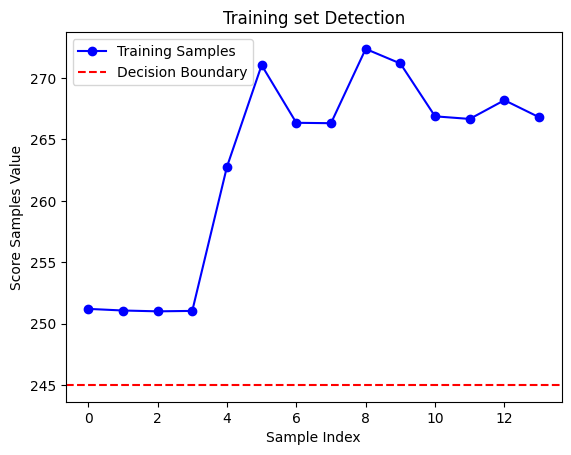

In [30]:
# Plotting score values
Z_train = clf.score_samples(X_train)

plt.title("Training set Detection")
plt.plot(Z_train, marker='o', linestyle='-', color='b', label='Training Samples')

plt.xlabel("Sample Index")
plt.ylabel("Score Samples Value")
plt.axhline(y=245, color='r', linestyle='--', label='Decision Boundary')

plt.legend()
plt.show()

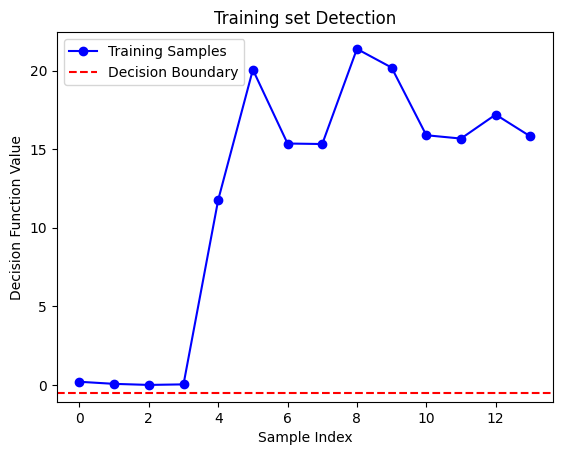

In [31]:
# Plotting decision function values
Z_train = clf.decision_function(X_train)

plt.title("Training set Detection")
plt.plot(Z_train, marker='o', linestyle='-', color='b', label='Training Samples')

plt.xlabel("Sample Index")
plt.ylabel("Decision Function Value")
plt.axhline(y=-0.5, color='r', linestyle='--', label='Decision Boundary')

plt.legend()
plt.show()

The first four samples were analysed at low concentration (2.8ppb and 5.7 ppb). 

### Import the new data and use the model for  prediction

In [32]:
new_data_IMS = pd.read_excel("/Users/giorgiofelizzato/Desktop/RISEN project/data fusion/Moduli python data fusion-final version/DMMP.xlsx", sheet_name='test_ims', index_col=None, header=0)

In [33]:
new_data_QEPAS = pd.read_excel("/Users/giorgiofelizzato/Desktop/RISEN project/data fusion/Moduli python data fusion-final version/DMMP.xlsx", sheet_name='test_qepas', index_col=None, header=0)

In [34]:
new_data_GC = pd.read_excel("/Users/giorgiofelizzato/Desktop/RISEN project/data fusion/Moduli python data fusion-final version/DMMP.xlsx", sheet_name='test_gc', index_col=None, header=0)

In [35]:
new_X_IMS = new_data_IMS.iloc[:,:]

In [36]:
# Compute the SNV on new IMS raw data
new_X_snv_IMS = snv_IMS(new_X_IMS.values)

In [37]:
new_X_QEPAS = new_data_QEPAS.iloc[:,:]

In [38]:
# Compute the SNV on new QEPAS raw data
new_X_snv_QEPAS = snv_QEPAS(new_X_QEPAS.values)

In [39]:
new_X_GC = new_data_GC.iloc[:,:]


In [40]:
new_X_GC_array = new_X_GC.values

In [41]:
# Create a new DataFrame with the processed IMS plasmagrams
new_processed_dataframe_IMS = pd.DataFrame(new_X_snv_IMS, columns=data_IMS.columns[1:])
new_processed_dataframe_IMS

,0.52,0.54,0.56,0.58,0.60,0.62,0.64,0.66,0.68,0.70,...,13.68,13.70,13.72,13.74,13.76,13.78,13.80,13.82,13.84,13.86
0,-0.184356,-0.184357,-0.18436,-0.184357,-0.18436,-0.184359,-0.184356,-0.184358,-0.184358,-0.184357,...,-0.184356,-0.184358,-0.184358,-0.184356,-0.184356,-0.184359,-0.184358,-0.184354,-0.184356,-0.184389


In [42]:
# Create a new DataFrame with the processed QEPAS plasmagrams
new_processed_dataframe_QEPAS = pd.DataFrame(new_X_snv_QEPAS, columns=data_QEPAS.columns[1:])
new_processed_dataframe_QEPAS

,10.0000,9.9804,9.9608,9.9413,9.9219,9.9025,9.8833,9.8641,9.8450,9.8259,...,8.1150,8.1021,8.0892,8.0763,8.0635,8.0507,8.0380,8.0253,8.0126,8.0000
0,-0.347955,-0.332007,-0.350919,-0.369564,-0.391369,-0.388447,-0.401436,-0.398748,-0.399118,-0.415215,...,2.271516,2.157777,1.974751,1.657661,1.276768,0.847929,0.420787,0.053737,-0.225854,-0.385676


In [43]:
# Create a new DataFrame with the processed RTs
new_processed_dataframe_RT = pd.DataFrame(new_X_GC_array, columns=data_GC.columns[1:])

import trace coordinate

In [44]:
#import coordinates trace GC-QEPAS
coordinates_GCQEPAS = pd.read_excel("/Users/giorgiofelizzato/Desktop/RISEN project/data fusion/Moduli python data fusion-final version/coordinate_trace.xlsx", sheet_name='Coordinate_GCQEPAS_trace', header=0)
coordinates_GCQEPAS.head()

,X (meter),Delta X,Y (meter),Delta Y,Z (meter),Delta Z
0,2.0,0.01,3.0,0.01,3.0,0.01


In [45]:
#import coordinates trace GC-QEPAS
coordinates_IMS = pd.read_excel("/Users/giorgiofelizzato/Desktop/RISEN project/data fusion/Moduli python data fusion-final version/coordinate_trace.xlsx", sheet_name='Coordinate_IMS_trace', header=0)
coordinates_IMS.head()

,X (meter),Delta X,Y (meter),Delta Y,Z (meter),Delta Z
0,2.0,0.01,3.0,0.01,3.0,0.01


In [46]:
THRESHOLD = 0.03  # Threshold for trace position difference

def check_trace_position(coord1, coord2):
    # Precalculate differences
    diff_x = abs(coord1['X (meter)'] - coord2['X (meter)'] + coord1['Delta X'] + coord2['Delta X'])
    diff_y = abs(coord1['Y (meter)'] - coord2['Y (meter)'] + coord1['Delta Y'] + coord2['Delta Y'])
    diff_z = abs(coord1['Z (meter)'] - coord2['Z (meter)'] + coord1['Delta Z'] + coord2['Delta Z'])

    # Differences must be lower than the threshold to accept the concatenation of the data
    return diff_x < THRESHOLD and diff_y < THRESHOLD and diff_z < THRESHOLD

def concatenation(coord1, coord2, IMS_data, QEPAS_data, RT_data):
    # Check sensors position
    if check_trace_position(coord1, coord2):
        # Concatenation of data if the trace position is ok
        combined_dataframe = pd.concat([IMS_data, QEPAS_data, RT_data], axis=1)
        return combined_dataframe
    else:
        return None

coordinates_associate = []  # Combined coordinates and data
coordinates_non_associate = []  # Non-associated coordinates

for index_gc, row_gc in coordinates_GCQEPAS.iterrows():
    coord_sensor1 = {'X (meter)': row_gc['X (meter)'], 'Y (meter)': row_gc['Y (meter)'],
                     'Z (meter)': row_gc['Z (meter)'], 'Delta X': row_gc['Delta X'],
                     'Delta Y': row_gc['Delta Y'], 'Delta Z': row_gc['Delta Z']}

    for index_ims, row_ims in coordinates_IMS.iterrows():
        coord_sensor2 = {'X (meter)': row_ims['X (meter)'], 'Y (meter)': row_ims['Y (meter)'],
                         'Z (meter)': row_ims['Z (meter)'], 'Delta X': row_ims['Delta X'],
                         'Delta Y': row_ims['Delta Y'], 'Delta Z': row_ims['Delta Z']}

        # Concatenation of data if the trace position is ok
        combined_dataframe = concatenation(coord_sensor1, coord_sensor2, new_processed_dataframe_IMS,
                                           new_processed_dataframe_QEPAS, new_processed_dataframe_RT)

        if combined_dataframe is not None:
            coordinates_associate.append(((index_gc, index_ims), combined_dataframe))
        else:
            coordinates_non_associate.append((index_gc, index_ims))

# Print outputs
for (index_gc, index_ims), combined_dataframe in coordinates_associate:
    print(f"Data from coordinates_GCQEPAS at index {index_gc} and coordinates_IMS at index {index_ims} can be combined.")
    print("Combined data:")
    print(combined_dataframe)

# Print non-associated coordinates
for index_gc, index_ims in coordinates_non_associate:
    print(f"Data from coordinates_GCQEPAS at index {index_gc} and coordinates_IMS at index {index_ims} CANNOT be combined.")

Data from coordinates_GCQEPAS at index 0 and coordinates_IMS at index 0 can be combined.
Combined data:
       0.52      0.54     0.56      0.58      0.6      0.62      0.64  \
0 -0.184356 -0.184357 -0.18436 -0.184357 -0.18436 -0.184359 -0.184356   

       0.66      0.68       0.7  ...    8.1021    8.0892    8.0763    8.0635  \
0 -0.184358 -0.184358 -0.184357  ...  2.157777  1.974751  1.657661  1.276768   

     8.0507     8.038    8.0253    8.0126         8     RT  
0  0.847929  0.420787  0.053737 -0.225854 -0.385676  55.99  

[1 rows x 797 columns]


In [47]:
combined_dataframe.columns = combined_dataframe.columns.astype(str)

In [48]:
y_pred_unknown = clf.predict(combined_dataframe)
y_pred_unknown

array([-1])

In [49]:
clf.score_samples(combined_dataframe)

array([109.81610221])

In [50]:
# Use the decision function to get the signed distance
decision_values = clf.decision_function(combined_dataframe)
decision_values

array([-141.17857747])

In [51]:
# Set your threshold
threshold = -0.50  # Adjust this threshold as needed

In [52]:
# Predict inliers and outliers based on the threshold
predictions = np.where(decision_values < threshold, "unknown", "DMMP")
predictions

array(['unknown'], dtype='<U7')

In [53]:
import plotly.graph_objects as go

# OneClassSVM model
Z_train = clf.score_samples(X_train)
decision_function_scores_unknown = clf.score_samples(combined_dataframe)

# Convert the scores to a pandas DataFrame
scores_df_train = pd.DataFrame({'Sample Index': X_train.index, 'Decision Function Scores': Z_train})
scores_df_unknown = pd.DataFrame({'Sample Index': [X_train.index.max() + 1], 'Decision Function Scores': decision_function_scores_unknown})
scores_df_unknown['Decision Function Scores'] = scores_df_unknown['Decision Function Scores'].round(decimals=2)

# Define thresholds
lower_threshold = 240
upper_threshold = 280

# Predict inliers and outliers based on the threshold for score samples
unknown_prediction = "DMMP"
if scores_df_unknown['Decision Function Scores'].iloc[0] < lower_threshold or scores_df_unknown['Decision Function Scores'].iloc[0] > upper_threshold:
    unknown_prediction = "Unknown sample"

# Create traces for training samples, unknown sample, and decision boundary
trace_train = go.Scatter(x=scores_df_train['Sample Index'], y=scores_df_train['Decision Function Scores'], mode='lines+markers',
                         name='Training Samples', line=dict(color='blue'))

trace_unknown = go.Scatter(x=scores_df_unknown['Sample Index'], y=scores_df_unknown['Decision Function Scores'], mode='markers',
                           name=f'Unknown Sample ({unknown_prediction})', marker=dict(color='red', size=10))

# Add labels for training samples
predictions = np.where(scores_df_train['Decision Function Scores'] < lower_threshold, "Unknown sample",
                       np.where(scores_df_train['Decision Function Scores'] > upper_threshold, "Unknown sample", "DMMP"))
annotations_train = [dict(x=scores_df_train['Sample Index'][i], y=scores_df_train['Decision Function Scores'][i],
                          text=predictions[i], showarrow=True, arrowhead=2, ax=0, ay=-30) for i in range(len(predictions))]

# Add label for unknown sample
annotations_unknown = [dict(x=scores_df_unknown['Sample Index'].iloc[0], y=scores_df_unknown['Decision Function Scores'].iloc[0],
                            text=unknown_prediction, showarrow=True, arrowhead=2, ax=0, ay=-30)]

# Create decision boundary traces
lower_decision_boundary_trace = go.Scatter(x=[scores_df_train['Sample Index'].min(), scores_df_train['Sample Index'].max()],
                                            y=[lower_threshold, lower_threshold], mode='lines', name='Lower Threshold',
                                            line=dict(color='green', dash='dash'))
upper_decision_boundary_trace = go.Scatter(x=[scores_df_train['Sample Index'].min(), scores_df_train['Sample Index'].max()],
                                            y=[upper_threshold, upper_threshold], mode='lines', name='Upper Threshold',
                                            line=dict(color='orange', dash='dash'))

# Create layout
layout = go.Layout(title="One-Class SVM Detection of DMMP", xaxis=dict(title="Sample Index"), yaxis=dict(title="Score Samples Value"),
                   legend=dict(x=1, y=0.5), annotations=annotations_train + annotations_unknown)

# Create figure
fig = go.Figure(data=[trace_train, trace_unknown, lower_decision_boundary_trace, upper_decision_boundary_trace], layout=layout)

fig.show()

In [54]:
# OneClassSVM model
Z_train = clf.decision_function(X_train)
decision_function_scores_unknown = clf.decision_function(combined_dataframe)

# Convert the scores to a pandas DataFrame
scores_df_train = pd.DataFrame({'Sample Index': X_train.index, 'Decision Function Scores': Z_train})
scores_df_unknown = pd.DataFrame({'Sample Index': [X_train.index.max() + 1], 'Decision Function Scores': decision_function_scores_unknown})
scores_df_unknown['Decision Function Scores'] = scores_df_unknown['Decision Function Scores'].round(decimals=2)

# Predict inliers and outliers based on the threshold for decision function value
threshold = -1
unknown_prediction = "unknown" if scores_df_unknown['Decision Function Scores'].iloc[0] < threshold else "DMMP"

# Create traces for training samples, unknown sample, and decision boundary
trace_train = go.Scatter(x=scores_df_train['Sample Index'], y=scores_df_train['Decision Function Scores'], mode='lines+markers',
                         name='Training Samples', line=dict(color='blue'))

trace_unknown = go.Scatter(x=scores_df_unknown['Sample Index'], y=scores_df_unknown['Decision Function Scores'], mode='markers',
                           name=f'Unknown Sample ({unknown_prediction})', marker=dict(color='red', size=10))

# Add labels for training samples
predictions = np.where(scores_df_train['Decision Function Scores'] < threshold, "unknown", "DMMP")
annotations_train = [dict(x=scores_df_train['Sample Index'][i], y=scores_df_train['Decision Function Scores'][i],
                           text=predictions[i], showarrow=True, arrowhead=2, ax=0, ay=-30) for i in range(len(predictions))]

# Add label for unknown sample
annotations_unknown = [dict(x=scores_df_unknown['Sample Index'].iloc[0], y=scores_df_unknown['Decision Function Scores'].iloc[0],
                             text=unknown_prediction, showarrow=True, arrowhead=2, ax=0, ay=-30)]

# Create decision boundary trace
decision_boundary_trace = go.Scatter(x=[scores_df_train['Sample Index'].min(), scores_df_train['Sample Index'].max()],
                                     y=[threshold, threshold], mode='lines', name='Decision Boundary', line=dict(color='red', dash='dash'))

# Create layout
layout = go.Layout(title="One-Class SVM Detection of DMMP", xaxis=dict(title="Sample Index"), yaxis=dict(title="Decision Function Scores"),
                   legend=dict(x=1, y=0.5), annotations=annotations_train + annotations_unknown)

# Create figure
fig = go.Figure(data=[trace_train, trace_unknown, decision_boundary_trace], layout=layout)

fig.show()

In [55]:
print("The method parameters were not calculated due to the lack of experimental data. \nModel accuracy = N/A \nModel precision = N/A \nModel selectivity = N/A \nAs a result, the data fusion method developed should be considered as a pilot study.")

The method parameters were not calculated due to the lack of experimental data. 
Model accuracy = N/A 
Model precision = N/A 
Model selectivity = N/A 
As a result, the data fusion method developed should be considered as a pilot study.
